In [27]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from libsvm.svmutil import svm_read_problem
from sklearn.model_selection import train_test_split

In [28]:
class Perceptron():

    def __init__(self, alpha=0.2, n_iter=100):
        self.alpha = alpha
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.alpha * (yi - self.predict(xi))
                self.w += update * xi
                self.b += update
                errors += int(update != 0.0)

            if errors == 0:
                break
            self.errors_.append(errors)

        return self


    def predict(self, xi):
        return np.where(np.dot(xi, self.w) + self.b <= 0.0, -1, 1)

    def predict_iris(self, xi):
        result = np.dot(xi, self.w) + self.b
        return np.where(result <= 0.0, -1, result)

In [29]:
y_raw, x_raw = svm_read_problem('a4a.txt')
dataset = np.zeros((len(y_raw), 123))

In [30]:
for i in range(len(y_raw)):
    line = x_raw[i]
    for k, v in line.items():
        dataset[i][k - 1] = v


In [31]:
y = np.array(y_raw)

In [32]:
perceptron = Perceptron(0.2, 1000)
perceptron.fit(dataset, y)

In [33]:
y_test, x_test = svm_read_problem('a4a.t')
dataset_test = np.zeros((len(y_test), 123))

In [34]:
for i in range(len(y_test)):
    line = x_test[i]
    for k, v in line.items():
        dataset_test[i][k - 1] = v

In [35]:
y_test = np.array(y_test)

In [36]:
predicted = np.zeros(len(y_test))
for i in range(len(y_test)):
    predicted[i] = perceptron.predict(dataset_test[i])

In [37]:
print('a4a')
print(len(predicted), ' test case predicted.', sep='')
correct_num = np.sum(predicted == y_test)
print(correct_num, ' are correct.', sep='')
print('Accuracy = ', np.round(correct_num * 100 / len(predicted)), '%', sep='')

a4a
27780 test case predicted.
22160 are correct.
Accuracy = 80.0%


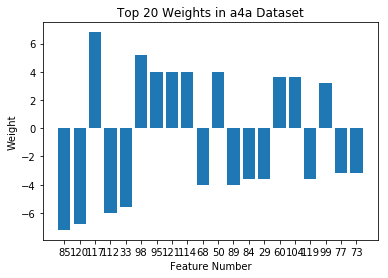

In [38]:
weights = perceptron.w
top_index = np.argsort(-np.abs(weights))[:20]
plt.figure()
plt.bar(list(map(str,top_index)), weights[top_index])
plt.xlabel('Feature Number')
plt.ylabel('Weight')
plt.title('Top 20 Weights in a4a Dataset')
plt.show(block=False)

##IRIS

In [39]:
y_raw, x_raw = svm_read_problem('iris.scale.txt')

y = np.array(y_raw)
x = np.zeros((len(y_raw), 4))
for i in range(len(y_raw)):
    line = x_raw[i]
    for k, v in line.items():
        x[i][k - 1] = v

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [41]:
y_train1 = np.copy(y_train)
y_train1[y_train1!=1] = -1
y_train1[y_train1!=-1] = 1

In [42]:
y_train2 = np.copy(y_train)
y_train2[y_train2!=2] = -1
y_train2[y_train2!=-1] = 1

In [43]:
y_train3 = np.copy(y_train)
y_train3[y_train3!=3] = -1
y_train3[y_train3!=-1] = 1

In [44]:
perceptron_iris1 = Perceptron(0.2, 1000)
perceptron_iris1.fit(x_train, y_train1)
perceptron_iris2 = Perceptron(0.2, 1000)
perceptron_iris2.fit(x_train, y_train2)
perceptron_iris3 = Perceptron(0.2, 1000)
perceptron_iris3.fit(x_train, y_train3)

In [45]:
predicted = np.zeros(len(y_test))
for i in range(len(y_test)):
    pred = np.zeros(3)
    pred[0] = perceptron_iris1.predict(x_test[i])
    pred[1] = perceptron_iris2.predict(x_test[i])
    pred[2] = perceptron_iris3.predict(x_test[i])
    predicted[i] = np.argmax(pred) + 1

In [50]:
print('iris')
print(len(predicted), ' test cases predicted.', sep='')
correct_num = np.sum(predicted == y_test)
print(correct_num, ' correct.', sep='')
print('Accuracy = ', np.round(correct_num * 100 / len(predicted)), '%', sep='')

iris
45 test case predicted.
33 are correct.
Accuracy = 73.0%


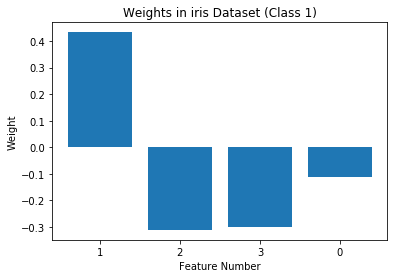

In [47]:
weights = perceptron_iris1.w
top_index = np.argsort(-np.abs(weights))
plt.figure()
plt.bar(list(map(str,top_index)), weights[top_index])
plt.xlabel('Feature Number')
plt.ylabel('Weight')
plt.title('Weights in iris Dataset (Class 1)')
plt.show(block=False)

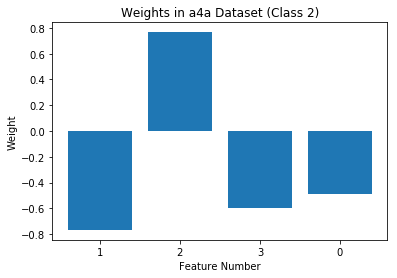

In [48]:
weights = perceptron_iris2.w
top_index = np.argsort(-np.abs(weights))
plt.figure()
plt.bar(list(map(str,top_index)), weights[top_index])
plt.xlabel('Feature Number')
plt.ylabel('Weight')
plt.title('Weights in a4a Dataset (Class 2)')
plt.show(block=False)

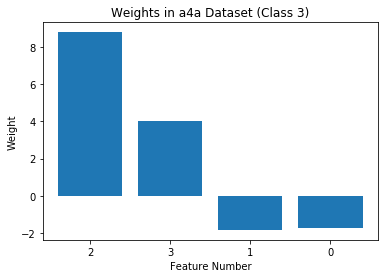

In [49]:
weights = perceptron_iris3.w
top_index = np.argsort(-np.abs(weights))
plt.figure()
plt.bar(list(map(str,top_index)), weights[top_index])
plt.xlabel('Feature Number')
plt.ylabel('Weight')
plt.title('Weights in a4a Dataset (Class 3)')
plt.show()